# Fonctions d'activation, Loss, Score disponibles dans Keras de TensorFlow :

Keras possède nativement un panel de fonctions prédéterminées pour l'activation (fonction d'), mais aussi de fonction Loss.  

## Fonctions d'activation disponibles dans Keras de TensorFlow :


* **Sigmoïde (Sigmoid)**: La fonction sigmoïde est une fonction d'activation qui transforme les valeurs d'entrée en une plage de 0 à 1. Cette fonction est couramment utilisée pour les problèmes de classification binaire.
$$f(x) = \frac{1}{{1 + e^{-x}}}$$

* **Tangente hyperbolique (Tanh)** : La fonction tanh est similaire à la sigmoïde, mais elle transforme les valeurs d'entrée en une plage de -1 à 1. Cette fonction est également couramment utilisée pour les problèmes de classification.

* **ReLU (Rectified Linear Unit)** : La fonction ReLU est une fonction d'activation qui transforme les valeurs d'entrée en une plage de 0 à l'infini. Cette fonction est couramment utilisée pour les problèmes de classification et de régression.
$$f(x) = \max(0, x)$$

* **Leaky ReLU** : La fonction Leaky ReLU est une variante de la fonction ReLU qui permet aux valeurs négatives d'être légèrement activées. Cette fonction est couramment utilisée pour les problèmes de classification et de régression.
$$f(x) = \begin{cases} x, & \text{si } x > 0 \\ \alpha x, & \text{sinon} \end{cases}\text{ , où } \alpha\text{ est un petit nombre positif.}$$


* **ELU (Exponential Linear Unit)** : La fonction ELU est une fonction d'activation qui est similaire à la fonction ReLU, mais elle permet aux valeurs négatives d'être activées de manière exponentielle. Cette fonction est couramment utilisée pour les problèmes de classification et de régression.
$$f(x) = \begin{cases} x, & \text{si } x > 0 \\ \alpha(e^x - 1), & \text{sinon} \end{cases} \text{, où }\alpha\text{ est un petit nombre positif.}$$


* **SELU (Scaled Exponential Linear Unit)** : La fonction SELU est une variante de la fonction ELU qui est conçue pour être auto-normalisante. Cette fonction est couramment utilisée pour les réseaux de neurones à propagation avant profonde.
$$f(x) = \lambda \begin{cases} x, & \text{si } x > 0 \\ \alpha(e^x - 1), & \text{sinon} \end{cases}\text{, où }\alpha\text{ et }\lambda\text{ sont des paramètres spécifiques.}$$


* **Softplus** : Une fonction douce et dérivable qui est utilisée dans certaines applications de réseaux de neurones $$ln(1+e^x)$$


* **Softmax** : La fonction softmax est une fonction d'activation de $I\!\!R^n \rightarrow I\!\!R^n$ qui transforme les valeurs d'entrée en une distribution de probabilité, où la somme des valeurs de sortie est égale à 1. Cette fonction est couramment utilisée pour les problèmes de classification avec plusieurs classes et utilisée sur la dernière couche de sortie.
$$f(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$$
Cette formule représente la fonction Softmax pour une variable d'entrée $x$ avec $n$ éléments. Elle calcule la probabilité relative de chaque élément dans $x$, normalisée de manière à ce que la somme des probabilités soit égale à 1. 


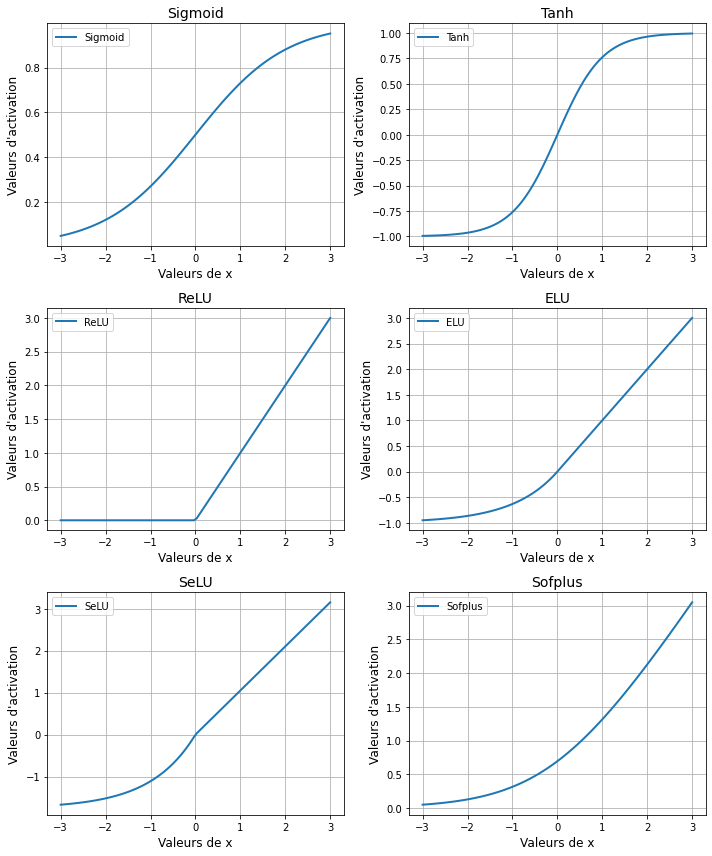

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import activations

# Créer un tableau de valeurs x allant de -3 à 3
x = np.linspace(-3, 3, 100)

# Fonctions d'activation à tracer
activation_functions = [('Sigmoid', activations.sigmoid),
                        ('Tanh', activations.tanh),
                        ('ReLU', activations.relu),
                        ('ELU', activations.elu),
                        ('SeLU', activations.selu),
                        ('Sofplus', activations.softplus)]

# Créer trois sous-figures
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Tracer les fonctions d'activation dans chaque sous-figure
for i in range(3):
    for j in range(2):
        func_name, func = activation_functions[i*2 + j]
        axes[i, j].plot(x, func(x), label=func_name, linewidth=2)
        axes[i, j].set_title(func_name, fontsize=14)
        axes[i, j].set_xlabel('Valeurs de x', fontsize=12)
        axes[i, j].set_ylabel('Valeurs d\'activation', fontsize=12)
        axes[i, j].grid(True)
        axes[i, j].legend(loc='upper left', fontsize=10)

# Ajuster l'espacement entre les sous-figures
plt.tight_layout()

# Afficher les sous-figures
plt.show()


## Fonctions Loss disponibles dans Keras :

Sur la base d'un ensemble d'apprentissage avec **N** est le nombre d'échantillons dans le jeu de données, $y_i$ la vraie valeur de l'échantilon et $\hat{y}_i$ la valeur prédite, on peux former de nombreuses fonction Loss dont les plus classique sont

* **Mean Squared Error (MSE)** : La fonction de MSE calcule la moyenne des carrés des différences entre les prédictions et les vraies valeurs. Cette fonction est couramment utilisée pour les problèmes de régression.
$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$
**Remarque :** cette dernière formule est valable dans le cas scalaire pour une sortie vectorielle avec $\| \|$ la norme euclidienne
$$MSE = \frac{1}{N} \sum_{i=1}^{N} \|y_i - \hat{y}_i\|^2$$

* **Mean Absolute Error (MAE)** : La fonction de MAE calcule la moyenne des valeurs absolues des différences entre les prédictions et les vraies valeurs. Cette fonction est également couramment utilisée pour les problèmes de régression.
$$MAE = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|$$
Elle possède son équivalent multidimensionnelle avec la norme $\| \|_1$
$$MAE = \frac{1}{N} \sum_{i=1}^{N} \|y_i - \hat{y}_i\|_1$$


* **Binary Cross-Entropy** : La fonction de Binary Cross-Entropy calcule l'entropie croisée entre les prédictions et les vraies valeurs pour les problèmes de classification binaire.
$$-\frac{1}{N}\sum_{i=1}^{N}[y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)]$$
**Attention$$ $y_i$ est la vraie valeur binaire (0 ou 1) de l'échantillon i, $\hat{y}_i$ est la probabilité prédite par le modèle pour l'échantillon i.
La Binary Cross-Entropy mesure la différence entre les probabilités prédites et les vraies valeurs binaires, et elle est utilisée comme fonction de perte pour les problèmes de classification binaire. Cette fonction de perte est plus sensible aux erreurs de classification que la Mean Squared Error, ce qui la rend plus adaptée pour les problèmes de classification binaire.

* **Categorical Cross-Entropy** : La fonction de Categorical Cross-Entropy calcule l'entropie croisée entre les prédictions et les vraies valeurs pour les problèmes de classification multi-classes.
$$-\frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{C}y_{i,j}\log(\hat{y}_{i,j})$$
$y_{i,j}$ est un indicateur binaire qui indique si l'échantillon i appartient à la classe j (1 si oui, 0 sinon), 
$\hat{y}_{i,j}$ est la probabilité prédite par le modèle pour l'échantillon i appartenant à la classe j.
La Categorical Cross-Entropy mesure la différence entre les probabilités prédites et les vraies valeurs de classification multi-classes. Cette fonction de perte est utilisée pour entraîner des modèles de classification multi-classes avec des étiquettes de classification codées en "one-hot". Elle est plus sensible aux erreurs de classification que la Mean Squared Error, ce qui la rend plus adaptée pour les problèmes de classification multi-classes.

* **Sparse Categorical Cross-Entropy** : La fonction de Sparse Categorical Cross-Entropy calcule l'entropie croisée entre les prédictions et les vraies valeurs pour les problèmes de classification multi-classes avec des étiquettes d'entiers.
$$-\frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{C}y_{i,j}\log(p_{i,j})$$
$y_i$ est l'étiquette d'entier de l'échantillon i (un entier qui représente la classe à laquelle appartient l'échantillon),
$p_{i,j}$ est la probabilité prédite par le modèle pour l'échantillon i appartenant à la classe j.
Cette fonction de perte est couramment utilisée dans les tâches de classification lorsque les étiquettes de classe sont représentées sous forme d'entiers (par exemple, 0, 1, 2, etc.) au lieu d'une représentation one-hot (encodage binaire). Elle mesure la divergence entre les probabilités prédites par le modèle et les étiquettes réelles pour chaque exemple. L'objectif est de minimiser cette divergence pour entraîner efficacement un modèle de classification.

* **Hinge Loss** : La fonction de Hinge Loss calcule la perte de charnière pour les problèmes de classification binaire ou multi-classes.
$$Hinge = \frac{1}{N}\sum_{i=1}^{N} \max(0, 1 - y_i \times \hat{y}_i)$$
où :
$y_{true}$ est la vraie étiquette de classification (-1 ou 1),
f(x) est la sortie prédite pour l'échantillon x.
La Hinge Loss est une fonction de perte utilisée pour l'apprentissage des machines à vecteurs de support (SVM) pour la classification binaire. Elle est utilisée pour maximiser la marge entre les classes en minimisant les erreurs de classification. Elle est souvent utilisée pour les problèmes de classification binaire avec des modèles linéaires. Si la sortie prédite pour l'échantillon x a le signe correct (c'est-à-dire que la prédiction est dans la même direction que la vraie étiquette de classification), alors la Hinge Loss est égale à zéro. Sinon, elle est proportionnelle à la distance entre la sortie prédite et la vraie étiquette de classification.

* **Poisson** : La fonction de Poisson calcule la perte de Poisson pour les problèmes de régression de Poisson.
$$ Poisson = \frac{1}{N}\sum_{i=1}^{N} \hat{y_i} - y_i\log(\hat{y_i})$$
où :
$y$ est la vraie valeur,
$\hat{y}$ est la valeur prédite.
La fonction de perte Poisson est souvent utilisée dans les modèles de régression pour prédire des valeurs positives, telles que le nombre de fois où un événement se produit. Elle est particulièrement utile lorsque les données suivent une distribution de Poisson, qui est une distribution de probabilité discrète souvent utilisée pour modéliser des événements rares. La fonction de perte Poisson mesure la distance entre les valeurs prédites et les vraies valeurs à l'aide de la log-vraisemblance de la distribution de Poisson. Elle est conçue pour minimiser la divergence entre la distribution de Poisson prédite et la distribution de Poisson réelle des données.

Il est également possible de construire facilement des fonctions loss, voici par exemple 2 mesures qui permettent de donner une autre approche :

* **Kullback-Leibler Divergence** : La fonction de Kullback-Leibler Divergence calcule la divergence de Kullback-Leibler entre les prédictions et les vraies valeurs.
$$D_{KL}(P||Q) = \sum_{i} P(i) \log\frac{P(i)}{Q(i)}$$
où :
P et Q sont deux distributions de probabilité sur le même espace d'événements,
i représente un événement dans l'espace d'événements,
$P(i)$ est la probabilité de l'événement i sous la distribution P,
$Q(i)$ est la probabilité de l'événement i sous la distribution Q.
La KL divergence mesure la distance entre deux distributions de probabilité. Elle est asymétrique, c'est-à-dire que la KL divergence de P à Q n'est pas la même que celle de Q à P. La KL divergence mesure la quantité d'information que l'on perd en utilisant une distribution Q pour approximer une distribution P. Elle est souvent utilisée comme fonction de perte pour des modèles de classification et de régression, lorsque la sortie du modèle est une distribution de probabilité et que l'on souhaite minimiser la distance entre la distribution prédite et la distribution réelle.

* **Cosine Similarity** : La fonction de Cosine Similarity calcule la distance cosinus entre les prédictions et les vraies valeurs.
$$\text{similarity}(x,y) = \frac{x\cdot y}{|x|\cdot|y|}$$
où :
$x$ et $y$ sont deux vecteurs,
$x\cdot y$ est leur produit scalaire,
$|x|$ et $|y|$ sont les normes euclidiennes des vecteurs $x$ et $y$.
La similarité cosinus mesure l'angle entre deux vecteurs dans l'espace vectoriel. Elle est utilisée pour mesurer la similarité entre deux vecteurs de caractéristiques, tels que les vecteurs de représentation de mots dans le traitement du langage naturel. Plus la valeur de la similarité cosinus est proche de 1, plus les vecteurs sont similaires, tandis que plus la valeur est proche de 0, plus les vecteurs sont différents. La similarité cosinus est souvent utilisée comme mesure de similarité pour des tâches telles que la recherche de documents et la recommandation de produits.

In [ ]:
# Exemple d'appel et d'utilisation des fonction Loss usuelles
from tensorflow import keras

# Créer un modèle Keras
model = keras.Sequential()
# Ajoutez vos couches au modèle

# Exemple de données et étiquettes d'entraînement (à remplacer par vos données réelles)
train_data = ...
train_labels = ...

# Compilation du modèle avec différentes fonctions de perte
# MSE (Mean Squared Error)
model.compile(loss='mean_squared_error', optimizer='adam')

# MAE (Mean Absolute Error)
model.compile(loss='mean_absolute_error', optimizer='adam')

# Binary Cross-Entropy (pour une classification binaire)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Categorical Cross-Entropy (pour une classification multiclasse avec encodage one-hot)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Sparse Categorical Cross-Entropy (pour une classification multiclasse avec étiquettes entières)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ensuite, vous pouvez entraîner votre modèle en utilisant la fonction model.fit() avec vos données d'entraînement.
model.fit(train_data, train_labels, epochs=10, batch_size=32)

# Fonctions de score disponibles dans Keras :

* **Accuracy** : La fonction d'accuracy calcule la proportion d'échantillons correctement classés par le modèle. Cette fonction est couramment utilisée pour les problèmes de classification.
$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$
où **TP** est le nombre de vrais positifs, **TN** est le nombre de vrais négatifs, **FP** est le nombre de faux positifs et **FN** est le nombre de faux négatifs.

* **Precision** : La fonction de Precision calcule la proportion des prédictions positives qui sont correctes parmi toutes les prédictions positives. Cette fonction est couramment utilisée pour les problèmes de classification.
$$Precision = \frac{TP}{TP+FP}$$

* **Recall** : La fonction Recall calcule la proportion des vrais positifs qui sont correctement identifiés parmi tous les vrais positifs et les faux négatifs. Cette fonction est couramment utilisée pour les problèmes de classification.
$$Recall = \frac{TP}{TP+FN}$$

* **F1 Score** : La fonction F1 Score est une mesure de la précision et du recall, qui calcule la moyenne harmonique entre les deux mesures. Cette fonction est couramment utilisée pour les problèmes de classification.
$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

* **Binary Accuracy** : La fonction Binary Accuracy calcule l'accuracy pour les problèmes de classification binaire.

* **Categorical Accuracy** : La fonction Categorical Accuracy calcule l'accuracy pour les problèmes de classification multi-classes.

* **Sparse Categorical Accuracy** : La fonction Sparse Categorical Accuracy calcule l'accuracy pour les problèmes de classification multi-classes avec des étiquettes d'entiers.

* **Top k Categorical Accuracy**: La fonction Top k Categorical Accuracy calcule l'accuracy pour les problèmes de classification multi-classes où l'on s'intéresse aux k classes les plus probables.

* **Mean Squared Error (MSE)** : La fonction de MSE calcule la moyenne des carrés des différences entre les prédictions et les vraies valeurs. Cette fonction est couramment utilisée pour les problèmes de régression.

* **Root Mean Squared Error (RMSE)** : La fonction de RMSE calcule la racine carrée de la moyenne des carrés des différences entre les prédictions et les vraies valeurs. Cette fonction est également couramment utilisée pour les problèmes de régression.